In [2]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

from itertools import combinations

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

# sns.set_style('dark')
# sns.set_style('ticks')
# plt.style.use('dark_background')

In [3]:
def hamming_distance(s1, s2):
#     print(s1,s2)
    assert len(s1) == len(s2)
    return sum(ch1 != ch2 for ch1, ch2 in zip(s1, s2))

In [18]:

condition = 'Evo1D_IRAs'
reps = [1,2]
timepoints = [0,1,4,7,10,13,16,19,22,24]

condition = 'Evo1D_TCG'
reps = [1,2]
timepoints = [0,1,4,8,10,13,16,19,22,24]

condition = 'Evo2D_Ira1_Mis'
condition = 'Evo2D_Ira1_Non'
reps = [1,2]
timepoints = [0,1,4,7,10,13,17,21,25]

# condition = 'Evo3D_Ira1_Mis'
# # condition = 'Evo3D_Ira1_Non'
# reps = [1,2,3]
# timepoints = [0,1,4,7,10,14,17,21]

# condition = 'Evo3D_TCG'
# reps = [1,2]
# timepoints = [0,1,4,7,10,14,17,21]



all_samples = []
for time in timepoints:
    if time == 0:
        all_samples.append(f'{condition}_0_0')
    else:
        for rep in reps:
            all_samples.append(f'{condition}_{rep}_{time}')


In [19]:
all_samples

['Evo2D_Ira1_Non_0_0',
 'Evo2D_Ira1_Non_1_1',
 'Evo2D_Ira1_Non_2_1',
 'Evo2D_Ira1_Non_1_4',
 'Evo2D_Ira1_Non_2_4',
 'Evo2D_Ira1_Non_1_7',
 'Evo2D_Ira1_Non_2_7',
 'Evo2D_Ira1_Non_1_10',
 'Evo2D_Ira1_Non_2_10',
 'Evo2D_Ira1_Non_1_13',
 'Evo2D_Ira1_Non_2_13',
 'Evo2D_Ira1_Non_1_17',
 'Evo2D_Ira1_Non_2_17',
 'Evo2D_Ira1_Non_1_21',
 'Evo2D_Ira1_Non_2_21',
 'Evo2D_Ira1_Non_1_25',
 'Evo2D_Ira1_Non_2_25']

In [12]:
# sample_dict = {}

# for sample in all_samples:
#     sample_dict[sample] = p.read_table(f'{condition}/{sample}/cluster_final.txt',names=['pair_name','high_diversity_BC','low_diversity_BC',f'{sample}_count'])
#     sample_dict[sample]['fused_bc'] = sample_dict[sample]['low_diversity_BC'] +'_'+ sample_dict[sample]['high_diversity_BC']
#     sample_dict[sample] = sample_dict[sample].drop(columns=['pair_name'])

In [13]:
# merged_samples = sample_dict[all_samples[0]]

# for sample in all_samples[1:]:
#     merged_samples = merged_samples.merge(sample_dict[sample],'outer',on=['fused_bc','high_diversity_BC','low_diversity_BC'])





In [28]:
sns.set_style('dark')
sns.set_style('ticks')
plt.style.use('dark_background')

sns.set_palette('Blues')
sns.set_palette('Blues_d')
sns.set_palette('dark:b')

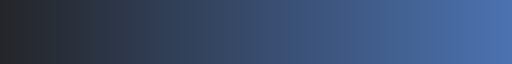

In [27]:
sns.color_palette("Blues_d", as_cmap=True) # IRA1_NON
sns.color_palette("dark:b", as_cmap=True) # IRA1_NON
# sns.color_palette("Blues", as_cmap=True) # IRA1_MIS 

In [15]:
# cutoff = 10
# nonzero = 5

# count_cols = [col for col in merged_samples if 'count' in col]

# cutoff_merged = merged_samples[np.any(merged_samples[count_cols]>cutoff,axis=1)]

# cutoff_merged = cutoff_merged.fillna(0)

# cutoff_merged = cutoff_merged[np.count_nonzero(cutoff_merged[count_cols],axis=1)>nonzero]

# cutoff_merged.to_csv(f'{condition}_counts_curated.csv',index=False)

In [22]:
cutoff_merged = p.read_csv(f'{condition}_counts_curated.csv')

In [23]:
cutoff_merged

,high_diversity_BC,low_diversity_BC,Evo2D_Ira1_Non_0_0_count,fused_bc,Evo2D_Ira1_Non_1_1_count,Evo2D_Ira1_Non_2_1_count,Evo2D_Ira1_Non_1_4_count,Evo2D_Ira1_Non_2_4_count,Evo2D_Ira1_Non_1_7_count,Evo2D_Ira1_Non_2_7_count,Evo2D_Ira1_Non_1_10_count,Evo2D_Ira1_Non_2_10_count,Evo2D_Ira1_Non_1_13_count,Evo2D_Ira1_Non_2_13_count,Evo2D_Ira1_Non_1_17_count,Evo2D_Ira1_Non_2_17_count,Evo2D_Ira1_Non_1_21_count,Evo2D_Ira1_Non_2_21_count,Evo2D_Ira1_Non_1_25_count,Evo2D_Ira1_Non_2_25_count
0,CAAACAAATGCTAAGGCTTTTCTCGA,CCAACAAAACACAAATCTGTTGTGTA,12.0,CCAACAAAACACAAATCTGTTGTGTA_CAAACAAATGCTAAGGCTT...,0.0,4.0,10.0,2.0,12.0,7.0,5.0,1.0,3.0,6.0,3.0,0.0,4.0,2.0,0.0,0.0
1,TCCATAACTTCAAATGTCATTCGGGT,CCAACAAAACACAAATCTGTTGTGTA,50.0,CCAACAAAACACAAATCTGTTGTGTA_TCCATAACTTCAAATGTCA...,1.0,30.0,82.0,31.0,88.0,64.0,32.0,24.0,22.0,58.0,36.0,16.0,9.0,9.0,0.0,2.0
2,GCGCTAAGGTCCAAGCCGGTTCTTGT,CCAACAAAACACAAATCTGTTGTGTA,56.0,CCAACAAAACACAAATCTGTTGTGTA_GCGCTAAGGTCCAAGCCGG...,0.0,31.0,57.0,27.0,79.0,54.0,34.0,38.0,26.0,42.0,19.0,30.0,9.0,14.0,1.0,1.0
3,AGCTAAATCTTAAACCATGTTAATAT,CCAACAAAACACAAATCTGTTGTGTA,9.0,CCAACAAAACACAAATCTGTTGTGTA_AGCTAAATCTTAAACCATG...,0.0,3.0,12.0,9.0,6.0,1.0,6.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,GTACGAATACTAAAGCCCTTTCTACG,CCAACAAAACACAAATCTGTTGTGTA,5.0,CCAACAAAACACAAATCTGTTGTGTA_GTACGAATACTAAAGCCCT...,0.0,1.0,13.0,8.0,10.0,10.0,9.0,4.0,10.0,10.0,5.0,1.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116657,ATTTAAAATACCAATTCTTTTGGGGA,CCAACAAAACACAAATCTGTTGTGTT,0.0,CCAACAAAACACAAATCTGTTGTGTT_ATTTAAAATACCAATTCTT...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,11.0,13.0,2.0,9.0,2.0
116658,GGTTCAACCATTAATGGCGTTGGCCT,CCAACAAAACACAAATCTGTTGTGTT,0.0,CCAACAAAACACAAATCTGTTGTGTT_GGTTCAACCATTAATGGCG...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,11.0,7.0,8.0,6.0,4.0
116659,TACTAAATAAGTAAGGGAATTCTGTT,CAAACAAAACAAAAATCTGTTGTGTA,0.0,CAAACAAAACAAAAATCTGTTGTGTA_TACTAAATAAGTAAGGGAA...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,47.0,1.0,72.0,3.0
116660,TACTAAATAAGTAAGGGAATTCTGTT,CCAACAAAACACAAATCTGTTGTGTG,0.0,CCAACAAAACACAAATCTGTTGTGTG_TACTAAATAAGTAAGGGAA...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224.0,5.0,784.0,5.0,1254.0,5.0


[1851702.   19013. 2729627. 3486864. 1475772. 1201456. 2772679. 3317031.
 3158026.]
[1851702. 1214779. 1381548. 2155238.  791124. 2562271. 3049215. 3159168.
 3143413.]


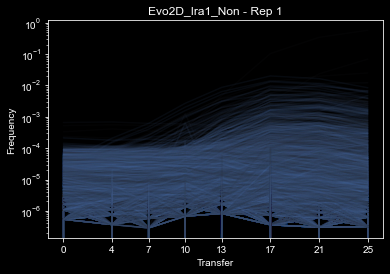

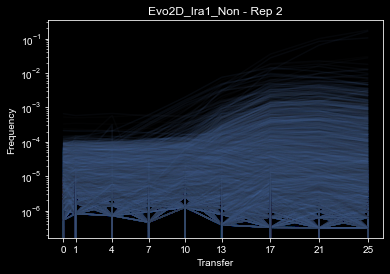

In [29]:
coverage_cutoff = 1e5

for rep in reps:
    exclude_times = []
    these_timepoints = [time for time in timepoints if time not in exclude_times]

    these_times = [f'{condition}_{rep}_{time}_count' for time in these_timepoints if time != 0]
    these_times = [f'{condition}_0_0_count'] + these_times

    these_counts = cutoff_merged[these_times].values
    

    these_freqs = these_counts/np.nansum(these_counts,axis=0)
    print(np.nansum(these_counts,axis=0))
    
    
    low_coverage = np.where(np.nansum(these_counts,axis=0)<coverage_cutoff)[0]
    
    these_freqs = np.delete(these_freqs,low_coverage,axis=1)
    these_times = np.delete(these_times,low_coverage)
    these_timepoints = np.delete(these_timepoints,low_coverage)
    
    plt.figure()
    plt.plot(these_timepoints,these_freqs.swapaxes(0,1)[:,:],alpha=0.1)
    plt.yscale('log')
    plt.xticks(these_timepoints,these_timepoints)
    plt.xlabel('Transfer')
    plt.ylabel('Frequency')
    plt.title(f'{condition} - Rep {rep}')
    plt.savefig(f'{condition}_{rep}_trajectories_dark.pdf',bbox_inches='tight')
    plt.savefig(f'{condition}_{rep}_trajectories_dark.png',dpi=200,bbox_inches='tight')

In [9]:
low_diversity_bcs = np.unique(cutoff_merged['low_diversity_BC'].values,return_counts=True)
low_diversity_bcs = {bc:count for bc,count in zip(low_diversity_bcs[0],low_diversity_bcs[1])}

low_d_bcs_sorted = [(k, low_diversity_bcs[k]) for k in sorted(low_diversity_bcs, key=low_diversity_bcs.get, reverse=True)]

color_cutoff = 0.01
color_number_cutoff = color_cutoff*np.sum(list(low_diversity_bcs.values()))

low_diversity_bc_colors = {low_d_bcs_sorted[i][0]:(sns.color_palette()[i] if list(low_d_bcs_sorted)[i][1] > color_number_cutoff else 'gray') for i in range(len(low_d_bcs_sorted)) }

In [ ]:
coverage_cutoff = 1e5

these_colors = [low_diversity_bc_colors[bc] for bc in cutoff_merged['low_diversity_BC'].values]

for rep in reps:
    exclude_times = []
    these_timepoints = [time for time in timepoints if time not in exclude_times]

    these_times = [f'{condition}_{rep}_{time}_count' for time in these_timepoints if time != 0]
    these_times = [f'{condition}_0_0_count'] + these_times

    these_counts = cutoff_merged[these_times].values
    

    these_freqs = these_counts/np.nansum(these_counts,axis=0)
    
    
    low_coverage = np.where(np.nansum(these_counts,axis=0)<coverage_cutoff)[0]
    
    these_freqs = np.delete(these_freqs,low_coverage,axis=1)
    these_times = np.delete(these_times,low_coverage)
    these_timepoints = np.delete(these_timepoints,low_coverage)
    
    plt.figure()
    fig,ax = plt.subplots()
    ax.set_prop_cycle(color=these_colors)
    plt.plot(these_timepoints,these_freqs.swapaxes(0,1)[:,:],alpha=0.1)
    plt.yscale('log')
    plt.xticks(these_timepoints,these_timepoints)
    plt.xlabel('Transfer')
    plt.ylabel('Frequency')
    plt.title(f'{condition} - Rep {rep}')
    plt.savefig(f'{condition}_{rep}_trajectories_lowdiversitycolor_dark.pdf',bbox_inches='tight')
    plt.savefig(f'{condition}_{rep}_trajectories_lowdiversitycolor_dark.png',dpi=200,bbox_inches='tight')

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [31]:
 color_cutoff*np.sum(list(low_diversity_bcs.values()))

709.11

In [32]:
low_d_bcs_sorted

[('TGATCAATCTACAAAAATATTTAATG', 42187),
 ('CATTGAATCACAAAATAGGTTAGATG', 28634),
 ('CGCTAAAGACATAATGTGGTTTGTTG', 36),
 ('GATCAATCTACAAAAATATTTAATGG', 17),
 ('ATTGAATCACAAAATAGGTTAGATGG', 8),
 ('TCCTAAAACACAAACCCCATTCTGGG', 4),
 ('TCACAAAATTACAACACTGTTTCGTT', 2),
 ('TGATCAATCTACAAAATATTTAATG', 2),
 ('TTAAAAATACAAAAAAAGATTTAAGG', 2),
 ('AGAACAAAAACTAAACTCATTCATGG', 1),
 ('CATTGAATCAAAATAGGTTAGATG', 1),
 ('CATTGAATCACAAAAATAGGTTAGATG', 1),
 ('CATTGAATCACAAAATAGGTAGATG', 1),
 ('CATTGAATCACAAAATAGGTTAGAT', 1),
 ('CATTGAATCACAAATAGGTTAGATG', 1),
 ('CATTGATCACAAAATAGGTTAGATG', 1),
 ('CCAACAAAAGGAAACGTATTTATTGA', 1),
 ('CCGCCAATCCCGAACCCCGTTTCGCC', 1),
 ('GACAGAAAAGCCAAATGGATTTACCG', 1),
 ('GCTAAAGACATAATGTGGTTTGTTGG', 1),
 ('TACCAAAAAGCTAAGTATTTTGCAAA', 1),
 ('TCGCTAAAGACATAATGTGGTTTGTT', 1),
 ('TCGTAAACGATGAATGTGTTTCATGA', 1),
 ('TGAATCACAAAATAGGTTAGATGGGT', 1),
 ('TGATCAATCTACAAAAAATATTTAATG', 1),
 ('TGATCAATCTACAAAAATATTTAAT', 1),
 ('TTGAATCACAAAATAGGTTAGATGGG', 1),
 ('TTTCAAACAGCCAAGCCAATT

In [19]:
cutoff_merged[cutoff_merged['Evo3D_TCG_2_21_count']>10000].sort_values(['Evo3D_TCG_2_21_count'])

,high_diversity_BC,low_diversity_BC,Evo3D_TCG_0_0_count,fused_bc,Evo3D_TCG_1_1_count,Evo3D_TCG_2_1_count,Evo3D_TCG_1_4_count,Evo3D_TCG_2_4_count,Evo3D_TCG_1_7_count,Evo3D_TCG_2_7_count,Evo3D_TCG_1_10_count,Evo3D_TCG_2_10_count,Evo3D_TCG_1_14_count,Evo3D_TCG_2_14_count,Evo3D_TCG_1_17_count,Evo3D_TCG_2_17_count,Evo3D_TCG_1_21_count,Evo3D_TCG_2_21_count
942544,GTGAAAACACCTAATCGCGTTTATTC,TTAAAAATACAAAAAAAGATTTAAGG,10.0,TTAAAAATACAAAAAAAGATTTAAGG_GTGAAAACACCTAATCGCG...,3.0,7.0,7.0,7.0,7.0,73.0,9.0,785.0,6.0,9152.0,2.0,14325.0,0.0,10107.0
710502,CTATTAAAAGGTAATACGTTTATATA,CTAGAAATCTCAAAAACTTTTGGCTG,8.0,CTAGAAATCTCAAAAACTTTTGGCTG_CTATTAAAAGGTAATACGT...,2.0,1.0,11.0,18.0,49.0,84.0,334.0,539.0,1043.0,4176.0,5664.0,9906.0,30.0,10349.0
1432722,ATGTTAACAAGAAAGACCTTTCTAAG,CCGCCAATCCCGAACCCCGTTTCGCC,13.0,CCGCCAATCCCGAACCCCGTTTCGCC_ATGTTAACAAGAAAGACCT...,8.0,4.0,24.0,9.0,160.0,68.0,1072.0,446.0,12306.0,4280.0,40860.0,8368.0,38069.0,10505.0
848726,TAGCTAACTCCTAAGGGCCTTATCTA,GTATTAAAATTAAAAATAATTGCACA,1.0,GTATTAAAATTAAAAATAATTGCACA_TAGCTAACTCCTAAGGGCC...,0.0,0.0,2.0,1.0,2.0,1.0,3.0,9.0,0.0,1164.0,1.0,6030.0,0.0,11755.0
1301222,CATATAACTTTCAAGCAGATTATGAC,CCAACAAAAGGAAACGTATTTATTGA,16.0,CCAACAAAAGGAAACGTATTTATTGA_CATATAACTTTCAAGCAGA...,12.0,11.0,34.0,44.0,172.0,158.0,899.0,1074.0,5868.0,7498.0,13720.0,14613.0,2141.0,11957.0
525691,TATGAAACCGCGAACAACTTTGTGTA,GACAGAAAAGCCAAATGGATTTACCG,15.0,GACAGAAAAGCCAAATGGATTTACCG_TATGAAACCGCGAACAACT...,6.0,3.0,14.0,22.0,151.0,165.0,1038.0,1109.0,11508.0,11478.0,24473.0,19865.0,9762.0,13269.0
434779,AGTTAAATTGGGAAGGGTATTTTGAG,AGAACAAAAACTAAACTCATTCATGG,51.0,AGAACAAAAACTAAACTCATTCATGG_AGTTAAATTGGGAAGGGTA...,61.0,47.0,72.0,105.0,582.0,259.0,4505.0,1281.0,20932.0,8181.0,68912.0,15697.0,6658.0,13296.0
963372,ATGGTAACATGTAATCTAGTTGTATC,GACAGAAAAGCCAAATGGATTTACCG,6.0,GACAGAAAAGCCAAATGGATTTACCG_ATGGTAACATGTAATCTAG...,7.0,10.0,34.0,41.0,177.0,155.0,883.0,917.0,6471.0,6571.0,11601.0,14663.0,3080.0,13793.0
699113,TCTAGAACAGATAATGTAGTTGTCGT,GACAGAAAAGCCAAATGGATTTACCG,21.0,GACAGAAAAGCCAAATGGATTTACCG_TCTAGAACAGATAATGTAG...,11.0,15.0,36.0,67.0,203.0,306.0,1061.0,1867.0,9913.0,12254.0,26833.0,26868.0,10012.0,25012.0
1198099,ACACGAAACTCCAAAGAATTTCTCCC,GACAGAAAAGCCAAATGGATTTACCG,46.0,GACAGAAAAGCCAAATGGATTTACCG_ACACGAAACTCCAAAGAAT...,32.0,25.0,70.0,92.0,465.0,446.0,2015.0,2489.0,13083.0,19754.0,27886.0,46733.0,3177.0,61061.0


In [20]:
len('GAGAAAAGTGACAAGAATTTTGGGAA')

26

In [21]:
len('ACTCTAACGTGTAACTAATTTTGAGT')

26

In [22]:
hamming_distance('ACTCTAACGTGTAACTAATTTTGAGT','GAGAAAAGTGACAAGAATTTTGGGAA')

17